## In this notebook:
-  **standardized five audio attributes data**

-  **audio attributes analysis by album: are they producing more similar or diverse albums**

-  **vectorized the attributes, calculated the distance between charlies' and shawns' songs，and mapped the most similar tracks based on audio distance **

-  **audio analysis by artist: are they producing similar hit songs? **



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
tracks = pd.read_csv("alltracks.csv")
tracks

,track_name,track_id,album,artist,audio_features,danceability,energy,key,loudness,mode,apeechiness,acousticness,instrumentalness,liveness,valence,tempo
0,In My Blood,21YnmkSDhUkmkkni22Svc4,Shawn Mendes,Shawn Mendes,"{'danceability': 0.618, 'energy': 0.711, 'key'...",0.618,0.711,5,-7.248,1,0.0706,0.0544,0.000000,0.1250,0.488,139.967
1,Nervous,0Dq49j3dELbttQVUJbtn0c,Shawn Mendes,Shawn Mendes,"{'danceability': 0.844, 'energy': 0.62, 'key':...",0.844,0.620,0,-6.783,1,0.0812,0.0422,0.000000,0.1500,0.724,121.989
2,Lost In Japan,6WBTeFDEfAJbaSUUc1V1xQ,Shawn Mendes,Shawn Mendes,"{'danceability': 0.708, 'energy': 0.695, 'key'...",0.708,0.695,10,-6.890,1,0.3720,0.2960,0.000000,0.1560,0.444,105.038
3,Where Were You In The Morning?,51wrmElSLxFzc0vSQPeTxs,Shawn Mendes,Shawn Mendes,"{'danceability': 0.714, 'energy': 0.519, 'key'...",0.714,0.519,7,-7.437,1,0.0708,0.5490,0.000000,0.0993,0.466,88.020
4,Like To Be You feat. Julia Michaels,5QskYLFPX9y7pLU0VEMNbr,Shawn Mendes,Shawn Mendes,"{'danceability': 0.747, 'energy': 0.452, 'key'...",0.747,0.452,2,-9.336,1,0.2090,0.8040,0.000000,0.1080,0.649,153.849
5,Fallin' All In You,5I8oEqbk2ZBmQfXCrZbUFb,Shawn Mendes,Shawn Mendes,"{'danceability': 0.852, 'energy': 0.479, 'key'...",0.852,0.479,8,-6.834,1,0.0372,0.4460,0.000000,0.1120,0.777,92.039
6,Particular Taste,1mmAqhLcvPrknbslMiDlyU,Shawn Mendes,Shawn Mendes,"{'danceability': 0.967, 'energy': 0.339, 'key'...",0.967,0.339,9,-7.581,1,0.1490,0.0352,0.000025,0.0702,0.598,111.978
7,Why,1KXFoiT2n4QXRsFvhWNI4I,Shawn Mendes,Shawn Mendes,"{'danceability': 0.698, 'energy': 0.427, 'key'...",0.698,0.427,0,-9.186,0,0.0458,0.6950,0.000001,0.0672,0.254,127.122
8,Because I Had You,7hlhojpax9zg2FNdBLY5ox,Shawn Mendes,Shawn Mendes,"{'danceability': 0.585, 'energy': 0.331, 'key'...",0.585,0.331,7,-9.900,1,0.4830,0.3480,0.000000,0.2960,0.713,202.650
9,Queen,17FyWGvqby379Q92sn23jW,Shawn Mendes,Shawn Mendes,"{'danceability': 0.879, 'energy': 0.677, 'key'...",0.879,0.677,1,-7.230,1,0.1220,0.2100,0.000000,0.0942,0.896,131.052


In [4]:

tracks.columns


Index(['track_name', 'track_id', 'album', 'artist', 'audio_features',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'apeechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [3]:
from math import pi

categories=['danceability','energy','loudness','acousticness','valence']
categories

['danceability', 'energy', 'loudness', 'acousticness', 'valence']

In [4]:
attribute = tracks[['track_name','danceability','energy','loudness','acousticness','valence']]
attribute

,track_name,danceability,energy,loudness,acousticness,valence
0,In My Blood,0.618,0.711,-7.248,0.0544,0.488
1,Nervous,0.844,0.620,-6.783,0.0422,0.724
2,Lost In Japan,0.708,0.695,-6.890,0.2960,0.444
3,Where Were You In The Morning?,0.714,0.519,-7.437,0.5490,0.466
4,Like To Be You feat. Julia Michaels,0.747,0.452,-9.336,0.8040,0.649
5,Fallin' All In You,0.852,0.479,-6.834,0.4460,0.777
6,Particular Taste,0.967,0.339,-7.581,0.0352,0.598
7,Why,0.698,0.427,-9.186,0.6950,0.254
8,Because I Had You,0.585,0.331,-9.900,0.3480,0.713
9,Queen,0.879,0.677,-7.230,0.2100,0.896


In [5]:
test = attribute.drop('track_name',axis=1)
test

,danceability,energy,loudness,acousticness,valence
0,0.618,0.711,-7.248,0.0544,0.488
1,0.844,0.620,-6.783,0.0422,0.724
2,0.708,0.695,-6.890,0.2960,0.444
3,0.714,0.519,-7.437,0.5490,0.466
4,0.747,0.452,-9.336,0.8040,0.649
5,0.852,0.479,-6.834,0.4460,0.777
6,0.967,0.339,-7.581,0.0352,0.598
7,0.698,0.427,-9.186,0.6950,0.254
8,0.585,0.331,-9.900,0.3480,0.713
9,0.879,0.677,-7.230,0.2100,0.896


In [6]:
test = attribute.drop('track_name',axis=1)

#standardize data
test = (test-test.mean())/test.std()
test.head()

,danceability,energy,loudness,acousticness,valence
0,-0.256609,0.977566,-0.380444,-1.160886,-0.102101
1,1.388283,0.385416,-0.101090,-1.206095,1.013032
2,0.398437,0.873452,-0.165372,-0.265603,-0.310008
3,0.442106,-0.271805,-0.493988,0.671924,-0.206055
4,0.682290,-0.707784,-1.634834,1.616863,0.658647


In [8]:
test['track_name'] = attribute['track_name']
test.head()

,danceability,energy,loudness,acousticness,valence,track_name
0,-0.256609,0.977566,-0.380444,-1.160886,-0.102101,In My Blood
1,1.388283,0.385416,-0.101090,-1.206095,1.013032,Nervous
2,0.398437,0.873452,-0.165372,-0.265603,-0.310008,Lost In Japan
3,0.442106,-0.271805,-0.493988,0.671924,-0.206055,Where Were You In The Morning?
4,0.682290,-0.707784,-1.634834,1.616863,0.658647,Like To Be You feat. Julia Michaels


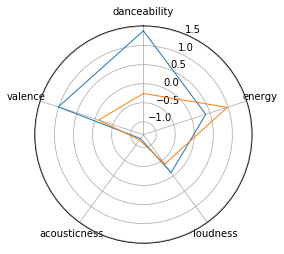

In [10]:
#test test

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# # Draw ylabels
# ax.set_rlabel_position(3)
# plt.yticks([0.2,0.4,0.6,0.8,1], ['0.2','0.4','0.6','0.8','1'], color="grey", size=7)
# plt.ylim(0,1)
 
 
# # ------- PART 2: Add plots
 
# # Plot each individual = each line of the data

 

# Ind1
values= test.loc[1].values.flatten().tolist()[:-1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Track1")
# ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values= test.loc[0].values.flatten().tolist()[:-1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Track1")
 
# # Add legend

# plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


In [25]:
tracks[tracks.album == 'Shawn Mendes'].index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

### Audio Attributes Analysis by Albums ###

Text(0.5,1.05,'Shawn Mendes')

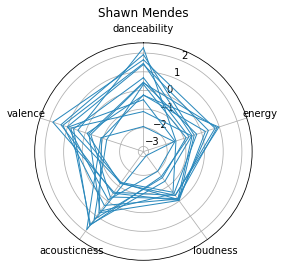

In [117]:

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# # Draw ylabels
# ax.set_rlabel_position(3)
# plt.yticks([0.2,0.4,0.6,0.8,1], ['0.2','0.4','0.6','0.8','1'], color="grey", size=7)
# plt.ylim(0,1)
 
 
# # ------- PART 2: Add plots #write into a for-loop
 
# # Plot each individual = each line of the data
# # I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
for n in tracks[tracks.album == 'Shawn Mendes'].index:
    values= test.loc[n].values.flatten().tolist()[:-1]
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid',color = '#2988bc')
ax.set_title('Shawn Mendes',pad=15)





In [28]:
tracks.album.unique()

array(['Shawn Mendes', 'Illuminate (Deluxe)', 'Handwritten (Deluxe)',
       'Voicenotes', 'Nine Track Mind (Deluxe)'], dtype=object)

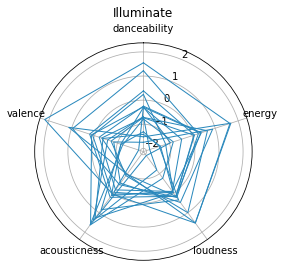

In [110]:




N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 

 
 
# # ------- PART 2: Add plots #write into a for-loop
 
# # Plot each individual = each line of the data

 
for n in tracks[tracks.album == 'Illuminate (Deluxe)'].index:
    values= test.loc[n].values.flatten().tolist()[:-1]
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid',color = '#2988bc')

ax.set_title('Illuminate',pad=15)
plt.savefig('illuminate_audio.pdf',bbox_inches='tight')




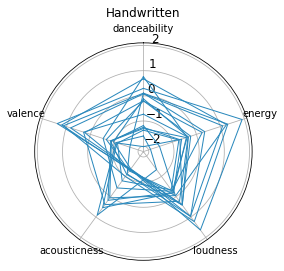

In [111]:

 
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(4)
plt.yticks([-2,-1,0,1,2], color="black", size=12)

 
 
# # ------- PART 2: Add plots #write into a for-loop
 
# # Plot each individual = each line of the data
# # I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
for n in tracks[tracks.album == 'Handwritten (Deluxe)'].index:
    values= test.loc[n].values.flatten().tolist()[:-1]
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid',color = '#2988bc') #4897d8


# plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
ax.set_title('Handwritten',pad=15)
plt.savefig('handwritten_audio.pdf',bbox_inches='tight')







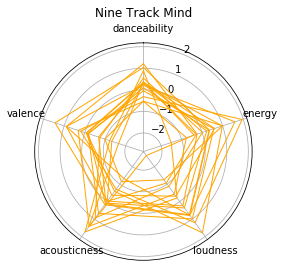

In [112]:

 
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 

 
 
# # ------- PART 2: Add plots #write into a for-loop
 
# # Plot each individual = each line of the data
# # I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
for n in tracks[tracks.album == 'Nine Track Mind (Deluxe)'].index:
    values= test.loc[n].values.flatten().tolist()[:-1]
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid',color = 'orange')


ax.set_title('Nine Track Mind',pad=15)
plt.savefig('nine_track_mind_audio.pdf',bbox_inches='tight')




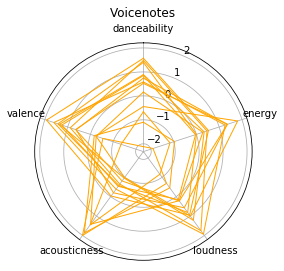

In [113]:




N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# # Draw ylabels
# ax.set_rlabel_position(3)
# plt.yticks([0.2,0.4,0.6,0.8,1], ['0.2','0.4','0.6','0.8','1'], color="grey", size=7)
# plt.ylim(0,1)
 
 
# # ------- PART 2: Add plots #write into a for-loop
 
# # Plot each individual = each line of the data
# # I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
for n in tracks[tracks.album == 'Voicenotes'].index:
    values= test.loc[n].values.flatten().tolist()[:-1]
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid',color = 'orange')

ax.set_title('Voicenotes',pad=15)
plt.savefig('voicenotes_audio.pdf',bbox_inches='tight')




In [49]:
# compare top 10 tracks of each artist:
# I removed my token and ids from spotify api here

import requests
import spotipy
import spotipy.util as util


from __future__ import print_function    # (at top of module)
from spotipy.oauth2 import SpotifyClientCredentials
import json
import spotipy
import time
import sys


token = token_sample
client_credentials_manager = SpotifyClientCredentials(client_id =id_sample,
                                                      client_secret = secret_sample)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager,auth = token)


# util.prompt_for_user_token('christina10211',scope,client_id='9edbacdb25834e6584dd3acdd1e205a0',client_secret='c37e7ad17ce04336b632ab98f06f5c98',redirect_uri='christina10211.github.io')








### Spotify top tracks of each singer ###

In [73]:


info = sp.artist_top_tracks('7n2wHs1TKAczGzO7Dd2rGr', country='US')['tracks']
shawn_10 = []
for n in info:
    shawn_10.append(n['name'])
shawn_10

['In My Blood',
 'Youth feat. Khalid',
 "There's Nothing Holdin' Me Back",
 'Like To Be You feat. Julia Michaels',
 'Nervous',
 'Treat You Better',
 'Lost In Japan',
 'Mercy',
 'Where Were You In The Morning?',
 "Fallin' All In You"]

In [69]:

info = sp.artist_top_tracks('6VuMaDnrHyPL1p4EHjYLi7', country='US')['tracks']
charlie_10 = []
for n in info:
    charlie_10.append(n['name'])
charlie_10

['Attention',
 'Done For Me (feat. Kehlani)',
 'How Long',
 'See You Again (feat. Charlie Puth)',
 "We Don't Talk Anymore (feat. Selena Gomez)",
 'The Way I Am',
 'Patient',
 'Marvin Gaye (feat. Meghan Trainor)',
 'One Call Away',
 'Dangerously']

In [71]:
tracks[tracks['track_name'].isin(charlie_10)]

,track_name,track_id,album,artist,audio_features,danceability,energy,key,loudness,mode,apeechiness,acousticness,instrumentalness,liveness,valence,tempo
46,The Way I Am,6qNALlmZa1ESnCxJmXE1K9,Voicenotes,Charlie Puth,"{'danceability': 0.755, 'energy': 0.769, 'key'...",0.755,0.769,10,-5.658,0,0.1860,0.314,0.000002,0.0628,0.642,114.966
47,Attention,5cF0dROlMOK5uNZtivgu50,Voicenotes,Charlie Puth,"{'danceability': 0.775, 'energy': 0.613, 'key'...",0.775,0.613,3,-4.586,0,0.0542,0.109,0.000023,0.1340,0.797,100.066
49,How Long,6wmAHw1szh5RCKSRjiXhPe,Voicenotes,Charlie Puth,"{'danceability': 0.845, 'energy': 0.561, 'key'...",0.845,0.561,1,-5.253,0,0.0778,0.211,0.000003,0.0383,0.811,109.974
50,Done For Me (feat. Kehlani),1lsBTdE6MGsKeZCD6llNu7,Voicenotes,Charlie Puth,"{'danceability': 0.856, 'energy': 0.632, 'key'...",0.856,0.632,6,-3.692,0,0.0740,0.193,0.000000,0.0688,0.697,112.009
51,Patient,2ZrHbO88rM6Ijeg0aJmSzl,Voicenotes,Charlie Puth,"{'danceability': 0.675, 'energy': 0.604, 'key'...",0.675,0.604,1,-6.266,1,0.1930,0.752,0.000000,0.1110,0.456,168.034
59,One Call Away,19f9roe77Hen23e6vJ1iBN,Nine Track Mind (Deluxe),Charlie Puth,"{'danceability': 0.667, 'energy': 0.613, 'key'...",0.667,0.613,1,-5.353,1,0.0344,0.403,0.000000,0.1150,0.470,91.024
60,Dangerously,0DbVHIAldoWzrImJU9WN5y,Nine Track Mind (Deluxe),Charlie Puth,"{'danceability': 0.696, 'energy': 0.517, 'key'...",0.696,0.517,2,-8.379,0,0.0366,0.364,0.000000,0.1970,0.230,112.291
61,Marvin Gaye (feat. Meghan Trainor),3qVZXhECuCCsPMm7toPO8X,Nine Track Mind (Deluxe),Charlie Puth,"{'danceability': 0.795, 'energy': 0.616, 'key'...",0.795,0.616,1,-5.281,0,0.0600,0.417,0.000000,0.3490,0.815,110.015
63,We Don't Talk Anymore (feat. Selena Gomez),4QArRxewE1TEJb8AiwfMYF,Nine Track Mind (Deluxe),Charlie Puth,"{'danceability': 0.728, 'energy': 0.563, 'key'...",0.728,0.563,1,-8.053,0,0.1340,0.621,0.000000,0.1790,0.352,100.017


In [74]:
tracks[tracks['track_name'].isin(shawn_10)]

,track_name,track_id,album,artist,audio_features,danceability,energy,key,loudness,mode,apeechiness,acousticness,instrumentalness,liveness,valence,tempo
0,In My Blood,21YnmkSDhUkmkkni22Svc4,Shawn Mendes,Shawn Mendes,"{'danceability': 0.618, 'energy': 0.711, 'key'...",0.618,0.711,5,-7.248,1,0.0706,0.0544,0.0,0.1250,0.488,139.967
1,Nervous,0Dq49j3dELbttQVUJbtn0c,Shawn Mendes,Shawn Mendes,"{'danceability': 0.844, 'energy': 0.62, 'key':...",0.844,0.620,0,-6.783,1,0.0812,0.0422,0.0,0.1500,0.724,121.989
2,Lost In Japan,6WBTeFDEfAJbaSUUc1V1xQ,Shawn Mendes,Shawn Mendes,"{'danceability': 0.708, 'energy': 0.695, 'key'...",0.708,0.695,10,-6.890,1,0.3720,0.2960,0.0,0.1560,0.444,105.038
3,Where Were You In The Morning?,51wrmElSLxFzc0vSQPeTxs,Shawn Mendes,Shawn Mendes,"{'danceability': 0.714, 'energy': 0.519, 'key'...",0.714,0.519,7,-7.437,1,0.0708,0.5490,0.0,0.0993,0.466,88.020
4,Like To Be You feat. Julia Michaels,5QskYLFPX9y7pLU0VEMNbr,Shawn Mendes,Shawn Mendes,"{'danceability': 0.747, 'energy': 0.452, 'key'...",0.747,0.452,2,-9.336,1,0.2090,0.8040,0.0,0.1080,0.649,153.849
5,Fallin' All In You,5I8oEqbk2ZBmQfXCrZbUFb,Shawn Mendes,Shawn Mendes,"{'danceability': 0.852, 'energy': 0.479, 'key'...",0.852,0.479,8,-6.834,1,0.0372,0.4460,0.0,0.1120,0.777,92.039
10,Youth feat. Khalid,5SwEgzUFDHwpWHKrbnP32Z,Shawn Mendes,Shawn Mendes,"{'danceability': 0.62, 'energy': 0.594, 'key':...",0.620,0.594,11,-6.678,0,0.0775,0.5780,0.0,0.1470,0.312,99.962
14,There's Nothing Holdin' Me Back,7JJmb5XwzOO8jgpou264Ml,Illuminate (Deluxe),Shawn Mendes,"{'danceability': 0.866, 'energy': 0.813, 'key'...",0.866,0.813,11,-4.063,0,0.0554,0.3800,0.0,0.0779,0.969,121.998
16,Mercy,0AS63m1wHv9n4VVRizK6Hc,Illuminate (Deluxe),Shawn Mendes,"{'danceability': 0.555, 'energy': 0.662, 'key'...",0.555,0.662,11,-4.952,0,0.0827,0.1250,0.0,0.1110,0.356,148.128
17,Treat You Better,48DKpTEVJ2pAjxQbWTad3q,Illuminate (Deluxe),Shawn Mendes,"{'danceability': 0.444, 'energy': 0.819, 'key'...",0.444,0.819,10,-4.078,0,0.3410,0.1060,0.0,0.1070,0.747,82.695


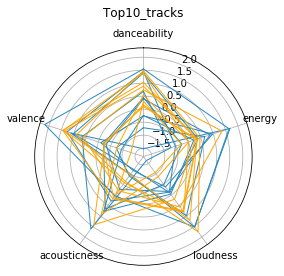

In [122]:
#charlie's top ten and shawn's top 10


N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# # Draw ylabels
# ax.set_rlabel_position(3)
# plt.yticks([0.2,0.4,0.6,0.8,1], ['0.2','0.4','0.6','0.8','1'], color="grey", size=7)
# plt.ylim(0,1)
 
 
# # ------- PART 2: Add plots #write into a for-loop
 
# # Plot each individual = each line of the data
# # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

 
for n in tracks[tracks['track_name'].isin(shawn_10)].index:
    values= test.loc[n].values.flatten().tolist()[:-1]
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid',color='#2988bc')

for n in tracks[tracks['track_name'].isin(charlie_10)].index:
    values= test.loc[n].values.flatten().tolist()[:-1]
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid',color = 'orange')
    


ax.set_title('Top10_tracks',pad=20)
plt.savefig('top10_tracks.pdf',bbox_inches='tight')




### No Promises vs Patient (they are most similar based on lyrics analysis, but what about audio wise?) ###

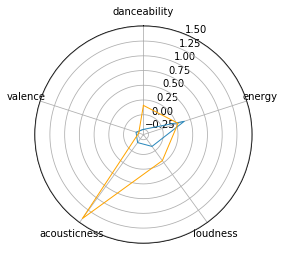

In [125]:


N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# # Draw ylabels
# ax.set_rlabel_position(3)
# plt.yticks([0.2,0.4,0.6,0.8,1], ['0.2','0.4','0.6','0.8','1'], color="grey", size=7)
# plt.ylim(0,1)
 
 
# # ------- PART 2: Add plots #write into a for-loop
 
# # Plot each individual = each line of the data


 
values= test.loc[21].values.flatten().tolist()[:-1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid',color='#2988bc')

values= test.loc[51].values.flatten().tolist()[:-1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid',color = 'orange')
    


### Which two songs are the most similar regarding their audio features?

In [ ]:
import math
def doc_distance(a_vec,b_vec):
    a_vec = a_vec/math.sqrt(sum([x*x for x in a_vec]))
    b_vec = b_vec/math.sqrt(sum([x*x for x in b_vec]))

In [144]:
(test.iloc[0][0]- test.iloc[1][0])**2

2.7056693668096994

**Turn the five attributes into elements of a vector, and calculate the distance between each song of two artists** 

In [244]:
charlie_index= tracks[tracks.artist=='Charlie Puth'].index
shawn_index= tracks[tracks.artist=='Shawn Mendes'].index

In [246]:
# all songs 
import math

shortest = 100
for i in charlie_index:
    a1 = test.iloc[i][0]
    a2 = test.iloc[i][1]
    a3 = test.iloc[i][2]
    a4 = test.iloc[i][3]
    a5 = test.iloc[i][4]
    for n in shawn_index:
        if n!=i:
            b1 = test.iloc[n][0]
            b2 = test.iloc[n][1]
            b3 = test.iloc[n][2]
            b4 = test.iloc[n][3]
            b5 = test.iloc[n][4]
            distance = math.sqrt(((a1-b1)**2+(a2-b2)**2+(a3-b3)**2+(a4-b4)**2+(a5-b5)**2))
            if distance < shortest:
                shortest = distance
                song1 = test.loc[i].track_name
                song2 = test.loc[n].track_name
                print(song1,song2,shortest,i,n)

The Way I Am In My Blood 1.8719100935459863 46 0
The Way I Am Nervous 1.72655868583136 46 1
The Way I Am Lost In Japan 1.3328345165226565 46 2
The Way I Am Honest 1.3112276880922231 46 23
The Way I Am I Know What You Did Last Summer 1.301073542766501 46 45
Attention Honest 1.2436949645881639 47 23
How Long Mutual 1.0886197157461088 49 11
How Long Honest 0.8336361427146624 49 23
BOY Stitches 0.8098508672640454 53 31
Empty Cups Honest 0.5761444165438593 57 23
Through It All Like This 0.559667348406944 58 20
My Gospel Lost In Japan 0.39971281675984993 64 2


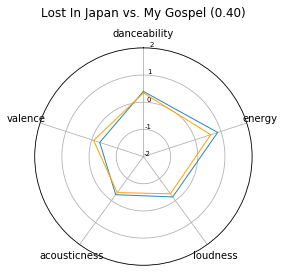

In [249]:
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(3)
# plt.yticks([-1,-0.5,0,0.5,1], ['-1','-0.5','0','0.5','1'], color="black", size=7)
# plt.ylim(-1,1)
plt.yticks([-2,-1,0,1,2], ['-2','-1','0','1','2'], color="black", size=7)
plt.ylim(-2,2)
 
 
# # ------- PART 2: Add plots #write into a for-loop
 
# # Plot each individual = each line of the data
# # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

 
values= test.loc[2].values.flatten().tolist()[:-1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid',color='#2988bc')

values= test.loc[64].values.flatten().tolist()[:-1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid',color = 'orange')
    
ax.set_title('Lost In Japan vs. My Gospel (0.40)',pad=20)
plt.savefig('most_similar_audio.pdf',bbox_inches='tight')

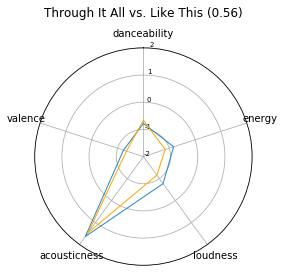

In [248]:
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(3)
# plt.yticks([-1,-0.5,0,0.5,1], ['-1','-0.5','0','0.5','1'], color="black", size=7)
# plt.ylim(-1,1)
plt.yticks([-2,-1,0,1,2], ['-2','-1','0','1','2'], color="black", size=7)
plt.ylim(-2,2)
 
 
# # ------- PART 2: Add plots #write into a for-loop
 
# # Plot each individual = each line of the data
# # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

 
values= test.loc[20].values.flatten().tolist()[:-1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid',color='#2988bc')

values= test.loc[58].values.flatten().tolist()[:-1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid',color = 'orange')
    
ax.set_title('Through It All vs. Like This (0.56)',pad=20)
plt.savefig('through_like.pdf',bbox_inches='tight')

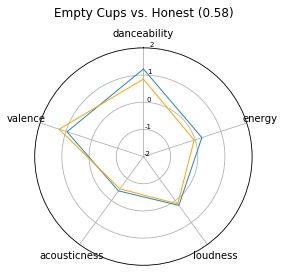

In [251]:
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(3)
# plt.yticks([-1,-0.5,0,0.5,1], ['-1','-0.5','0','0.5','1'], color="black", size=7)
# plt.ylim(-1,1)
plt.yticks([-2,-1,0,1,2], ['-2','-1','0','1','2'], color="black", size=7)
plt.ylim(-2,2)
 
 
# # ------- PART 2: Add plots #write into a for-loop
 
# # Plot each individual = each line of the data
# # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

 
values= test.loc[23].values.flatten().tolist()[:-1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid',color='#2988bc')

values= test.loc[57].values.flatten().tolist()[:-1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid',color = 'orange')
    
ax.set_title('Empty Cups vs. Honest (0.58)',pad=20)
plt.savefig('honest_cups.pdf',bbox_inches='tight')

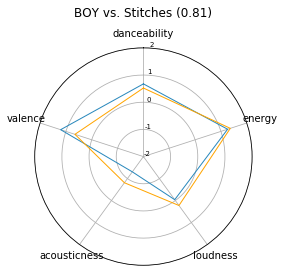

In [252]:
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(3)
# plt.yticks([-1,-0.5,0,0.5,1], ['-1','-0.5','0','0.5','1'], color="black", size=7)
# plt.ylim(-1,1)
plt.yticks([-2,-1,0,1,2], ['-2','-1','0','1','2'], color="black", size=7)
plt.ylim(-2,2)
 
 
# # ------- PART 2: Add plots #write into a for-loop
 
# # Plot each individual = each line of the data
# # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

 
values= test.loc[31].values.flatten().tolist()[:-1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid',color='#2988bc')

values= test.loc[53].values.flatten().tolist()[:-1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid',color = 'orange')
    
ax.set_title('BOY vs. Stitches (0.81)',pad=20)
plt.savefig('boy_stitches.pdf',bbox_inches='tight')

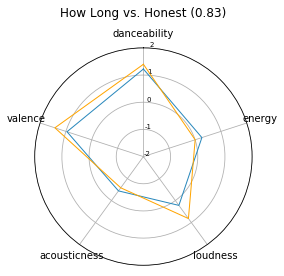

In [253]:
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(3)
# plt.yticks([-1,-0.5,0,0.5,1], ['-1','-0.5','0','0.5','1'], color="black", size=7)
# plt.ylim(-1,1)
plt.yticks([-2,-1,0,1,2], ['-2','-1','0','1','2'], color="black", size=7)
plt.ylim(-2,2)
 
 
# # ------- PART 2: Add plots #write into a for-loop
 
# # Plot each individual = each line of the data
# # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

 
values= test.loc[23].values.flatten().tolist()[:-1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid',color='#2988bc')

values= test.loc[49].values.flatten().tolist()[:-1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid',color = 'orange')
    
ax.set_title('How Long vs. Honest (0.83)',pad=20)
plt.savefig('howlong_honest.pdf',bbox_inches='tight')

### Are they repetitive in themselves? Are they producing similar tracks? What are the most similar tracks? ###

In [277]:
#Charlie Puth Similarity in songs


# all songs 
import math
songs1 = []
songs2 = []
distances = []
shortest = 100
for i in charlie_index:
    a1 = test.iloc[i][0]
    a2 = test.iloc[i][1]
    a3 = test.iloc[i][2]
    a4 = test.iloc[i][3]
    a5 = test.iloc[i][4]
    for n in charlie_index:
        if n!=i:
            b1 = test.iloc[n][0]
            b2 = test.iloc[n][1]
            b3 = test.iloc[n][2]
            b4 = test.iloc[n][3]
            b5 = test.iloc[n][4]
            distance = math.sqrt(((a1-b1)**2+(a2-b2)**2+(a3-b3)**2+(a4-b4)**2+(a5-b5)**2))
            song1 = test.loc[i].track_name
            
            songs1.append(song1)
            song2 = test.loc[n].track_name
            songs2.append(song2)
            distances.append(distance)
            shortest = distance
            
df_ch = pd.DataFrame({
    'song1':songs1,
    'song2':songs2,
    'distance':distances
})           

In [280]:
df_ch.sort_values(by='distance')[df_ch.sort_values(by='distance').distance<=1]
#Does it feel vs Somebody Told Me 0.59
#Up All Night vs. One Call Away 0.66
#One Call Away vs Same Type of Love 0.69
#BOY vs The Way I am 0.74
#Empty Cups vs As You Are (feat. Shy Carter) 0.75
#

,song1,song2,distance
712,Does It Feel,Somebody Told Me,0.588928
295,Somebody Told Me,Does It Feel,0.588928
526,Up All Night,One Call Away,0.656350
369,One Call Away,Up All Night,0.656350
374,One Call Away,Some Type Of Love,0.689339
661,Some Type Of Love,One Call Away,0.689339
189,BOY,The Way I Am,0.737818
6,The Way I Am,BOY,0.737818
319,Empty Cups,As You Are (feat. Shy Carter),0.754838
632,As You Are (feat. Shy Carter),Empty Cups,0.754838


In [281]:
#Shawn Mendes Similarity in songs


# all songs 
import math
songs1 = []
songs2 = []
distances = []
shortest = 100
for i in shawn_index:
    a1 = test.iloc[i][0]
    a2 = test.iloc[i][1]
    a3 = test.iloc[i][2]
    a4 = test.iloc[i][3]
    a5 = test.iloc[i][4]
    for n in shawn_index:
        if n!=i:
            b1 = test.iloc[n][0]
            b2 = test.iloc[n][1]
            b3 = test.iloc[n][2]
            b4 = test.iloc[n][3]
            b5 = test.iloc[n][4]
            distance = math.sqrt(((a1-b1)**2+(a2-b2)**2+(a3-b3)**2+(a4-b4)**2+(a5-b5)**2))
            song1 = test.loc[i].track_name
            
            songs1.append(song1)
            song2 = test.loc[n].track_name
            songs2.append(song2)
            distances.append(distance)
            shortest = distance
            
df_sh = pd.DataFrame({
    'song1':songs1,
    'song2':songs2,
    'distance':distances
})           

In [288]:
df_sh.sort_values(by='distance')[df_sh.sort_values(by='distance').distance<=1]

,song1,song2,distance
1664,Strings,I Know What You Did Last Summer,0.571978
2061,I Know What You Did Last Summer,Strings,0.571978
947,No Promises,Lost In Japan,0.823032
110,Lost In Japan,No Promises,0.823032
1112,Patience,Kid In Love,0.844420
1509,Kid In Love,Patience,0.844420
67,Nervous,Honest,0.858311
1036,Honest,Nervous,0.858311
1977,Imagination,Bring It Back,0.863554
1932,Bring It Back,Imagination,0.863554


### A better way to figure out the most similar song ###

In [289]:

#building dataframes

# all songs 
import math
songs1 = []
songs2 = []
distances = []
shortest = 100
for i in shawn_index:
    a1 = test.iloc[i][0]
    a2 = test.iloc[i][1]
    a3 = test.iloc[i][2]
    a4 = test.iloc[i][3]
    a5 = test.iloc[i][4]
    for n in charlie_index:
        if n!=i:
            b1 = test.iloc[n][0]
            b2 = test.iloc[n][1]
            b3 = test.iloc[n][2]
            b4 = test.iloc[n][3]
            b5 = test.iloc[n][4]
            distance = math.sqrt(((a1-b1)**2+(a2-b2)**2+(a3-b3)**2+(a4-b4)**2+(a5-b5)**2))
            song1 = test.loc[i].track_name
            
            songs1.append(song1)
            song2 = test.loc[n].track_name
            songs2.append(song2)
            distances.append(distance)
            shortest = distance
            
df_all = pd.DataFrame({
    'song1':songs1,
    'song2':songs2,
    'distance':distances
})           

In [306]:
df_all.sort_values(by='distance')[df_all.sort_values(by='distance').distance<=1].head(10)

,song1,song2,distance
74,Lost In Japan,My Gospel,0.399713
1035,Strings,Nothing But Trouble - Instagram Models Dance R...,0.551009
572,Like This,Through It All,0.559667
655,Honest,Empty Cups,0.576144
667,Honest,As You Are (feat. Shy Carter),0.659279
1287,I Know What You Did Last Summer,Nothing But Trouble - Instagram Models Dance R...,0.662291
606,No Promises,My Gospel,0.704175
163,Fallin' All In You,As You Are (feat. Shy Carter),0.720327
101,Where Were You In The Morning?,We Don't Talk Anymore (feat. Selena Gomez),0.768542
875,Stitches,BOY,0.809851


In [307]:
test[test.track_name.isin(['Honest','Empty Cups','As You Are (feat. Shy Carter)','I Know What You Did Last Summer','Strings','Fallin\' All In You'])]

,danceability,energy,loudness,acousticness,valence,track_name
5,1.446510,-0.532091,-0.131729,0.290243,1.263465,Fallin' All In You
23,1.220883,0.261781,0.219716,-0.439768,0.956331,Honest
36,0.078192,1.094695,0.965862,-1.354284,0.828752,Strings
45,0.107305,1.309431,1.222387,-0.991909,1.116985,I Know What You Did Last Summer
57,0.849690,-0.037548,0.152431,-0.532409,1.258740,Empty Cups
69,1.206326,-0.245777,0.247952,-0.024736,0.894904,As You Are (feat. Shy Carter)


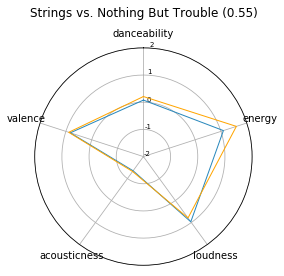

In [305]:
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(3)
# plt.yticks([-1,-0.5,0,0.5,1], ['-1','-0.5','0','0.5','1'], color="black", size=7)
# plt.ylim(-1,1)
plt.yticks([-2,-1,0,1,2], ['-2','-1','0','1','2'], color="black", size=7)
plt.ylim(-2,2)
 
 
# # ------- PART 2: Add plots #write into a for-loop
 
# # Plot each individual = each line of the data
# # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

 
values= test.loc[36].values.flatten().tolist()[:-1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid',color='#2988bc')

values= test.loc[73].values.flatten().tolist()[:-1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid',color = 'orange')


ax.set_title('Strings vs. Nothing But Trouble (0.55)',pad=20)
plt.savefig('Strings_trouble.pdf',bbox_inches='tight')

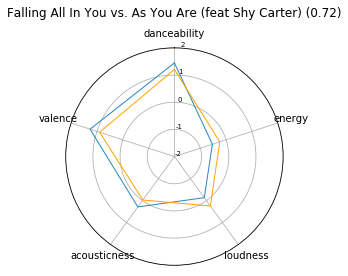

In [309]:
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(3)
# plt.yticks([-1,-0.5,0,0.5,1], ['-1','-0.5','0','0.5','1'], color="black", size=7)
# plt.ylim(-1,1)
plt.yticks([-2,-1,0,1,2], ['-2','-1','0','1','2'], color="black", size=7)
plt.ylim(-2,2)
 
 
# # ------- PART 2: Add plots #write into a for-loop
 
# # Plot each individual = each line of the data
# # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

 
values= test.loc[5].values.flatten().tolist()[:-1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid',color='#2988bc')

values= test.loc[69].values.flatten().tolist()[:-1]
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid',color = 'orange')


ax.set_title('Falling All In You vs. As You Are (feat Shy Carter) (0.72)',pad=20)
plt.savefig('falling_asall.pdf',bbox_inches='tight')